### Task 5: Predicting the team with the highest super-performance total

In [1174]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [1175]:
df = pd.read_csv("team_data.csv", sep=",")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 66 columns):
Unnamed: 0                            68 non-null int64
total_points_scored_match_played      68 non-null int64
total_points_scored_rank              68 non-null int64
team_id                               68 non-null int64
team_name                             68 non-null object
total_points_scored                   68 non-null int64
total_points_conceded_match_played    68 non-null int64
total_points_conceded_rank            68 non-null int64
total_points_conceded                 68 non-null int64
avg_points_scored_match_played        68 non-null int64
avg_points_scored_rank                68 non-null int64
avg_points_scored                     68 non-null float64
successful_raids_match_played         68 non-null int64
successful_raids_rank                 68 non-null int64
successful_raids                      68 non-null int64
raid_points_match_played              68 non-null int6

In [1176]:
#extract non zero columns 
df_new = df.loc[:, (df != 0).any(axis=0)]


In [1177]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 59 columns):
Unnamed: 0                            68 non-null int64
total_points_scored_match_played      68 non-null int64
total_points_scored_rank              68 non-null int64
team_id                               68 non-null int64
team_name                             68 non-null object
total_points_scored                   68 non-null int64
total_points_conceded_match_played    68 non-null int64
total_points_conceded_rank            68 non-null int64
total_points_conceded                 68 non-null int64
avg_points_scored_match_played        68 non-null int64
avg_points_scored_rank                68 non-null int64
avg_points_scored                     68 non-null float64
successful_raids_match_played         68 non-null int64
successful_raids_rank                 68 non-null int64
successful_raids                      68 non-null int64
raid_points_match_played              68 non-null int6

In [1178]:
#drop irrelevant column 
df_new.drop(columns="Unnamed: 0",axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [1179]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 58 columns):
total_points_scored_match_played      68 non-null int64
total_points_scored_rank              68 non-null int64
team_id                               68 non-null int64
team_name                             68 non-null object
total_points_scored                   68 non-null int64
total_points_conceded_match_played    68 non-null int64
total_points_conceded_rank            68 non-null int64
total_points_conceded                 68 non-null int64
avg_points_scored_match_played        68 non-null int64
avg_points_scored_rank                68 non-null int64
avg_points_scored                     68 non-null float64
successful_raids_match_played         68 non-null int64
successful_raids_rank                 68 non-null int64
successful_raids                      68 non-null int64
raid_points_match_played              68 non-null int64
raid_points_rank                      68 non-null int6

In [1180]:
#verify if any column has all value 0
df_new.isnull().sum()

total_points_scored_match_played      0
total_points_scored_rank              0
team_id                               0
team_name                             0
total_points_scored                   0
total_points_conceded_match_played    0
total_points_conceded_rank            0
total_points_conceded                 0
avg_points_scored_match_played        0
avg_points_scored_rank                0
avg_points_scored                     0
successful_raids_match_played         0
successful_raids_rank                 0
successful_raids                      0
raid_points_match_played              0
raid_points_rank                      0
raid_points                           0
avg_raid_points_match_played          0
avg_raid_points_rank                  0
avg_raid_points                       0
successful_tackles_match_played       0
successful_tackles_rank               0
successful_tackles                    0
tackle_points_match_played            0
tackle_points_rank                    0


In [1181]:
# converting boolean to numeric 
df_new["is_qualified"] = df_new["is_qualified"].astype(int)



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [1182]:
df_new["is_qualified"]

0     1
1     0
2     0
3     1
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    1
13    1
14    1
15    1
16    1
17    0
18    1
19    0
20    0
21    0
22    0
23    0
24    1
25    1
26    1
27    1
28    1
29    1
     ..
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
50    0
51    0
52    0
53    0
54    0
55    0
56    0
57    0
58    0
59    0
60    0
61    0
62    0
63    0
64    0
65    0
66    0
67    0
Name: is_qualified, Length: 68, dtype: int64

In [1183]:
#S.P.T. = Total number of super-raids in the tournament +
#       total number of super-tackles in the tournament + 
#       total number of all-outs inflicted in the tournament 
#      - total number of all-outs conceded in the tournament




df_new["SPT"] =df_new['super_raid'] +  df_new['super_tackles'] + df_new['all_outs_inflicted'] - df_new['all_outs_conceded']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [1184]:
#rank season wise
df_new['SPT_rank'] = df_new.groupby(df_new.season)["SPT"].rank(ascending=False).astype(int)




/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [1185]:
df_new[["SPT","SPT_rank","season"]]

,SPT,SPT_rank,season
0,41,1,7
1,28,7,7
2,39,2,7
3,29,5,7
4,29,5,7
5,18,8,7
6,36,3,7
7,29,5,7
8,4,12,7
9,15,10,7


In [1186]:
#calulate performance rate (total point earned/match played)

col_t = df_new.columns[df_new.columns.str.endswith('_match_played')]

col_s = ['total_points_scored',
       'total_points_conceded', 'avg_points_scored',
       'successful_raids', 'raid_points',
       'avg_raid_points', 'successful_tackles',
       'tackle_points', 'avg_tackle_points',
       'super_raid', 'super_tackles',
       'do_or_die_raid_points', 'all_outs_inflicted',
       'all_outs_conceded']

point = "_p"

for i in range(len(col_t)):
    df_new[col_s[i]+point] = df_new[col_s[i]]/df_new[col_t[i]]


df_new.drop(col_s, axis=1, inplace=True)
df_new.drop(col_t, axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [1188]:
#calculate wining rate
df_new["win_rate"] = df_new["wins"]/df_new["played"]

In [1189]:
df_new.drop(["wins", "played"], axis=1, inplace=True)

In [1190]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 45 columns):
total_points_scored_rank      68 non-null int64
team_id                       68 non-null int64
team_name                     68 non-null object
total_points_conceded_rank    68 non-null int64
avg_points_scored_rank        68 non-null int64
successful_raids_rank         68 non-null int64
raid_points_rank              68 non-null int64
avg_raid_points_rank          68 non-null int64
successful_tackles_rank       68 non-null int64
tackle_points_rank            68 non-null int64
avg_tackle_points_rank        68 non-null int64
super_raid_rank               68 non-null int64
super_tackles_rank            68 non-null int64
do_or_die_raid_points_rank    68 non-null int64
all_outs_inflicted_rank       68 non-null int64
all_outs_conceded_rank        68 non-null int64
season                        68 non-null int64
winner                        68 non-null int64
draws                         68

In [1191]:
df_new.to_csv("team_data_final.csv",sep=",")

In [1192]:
#extract test data for season 7
test_data = df_new[df_new['season']==7]

In [1193]:
test_data.head()

,total_points_scored_rank,team_id,team_name,total_points_conceded_rank,avg_points_scored_rank,successful_raids_rank,raid_points_rank,avg_raid_points_rank,successful_tackles_rank,tackle_points_rank,...,avg_raid_points_p,successful_tackles_p,tackle_points_p,avg_tackle_points_p,super_raid_p,super_tackles_p,do_or_die_raid_points_p,all_outs_inflicted_p,all_outs_conceded_p,win_rate
0,1,4,Bengal Warriors,7,1,1,1,1,4,6,...,1.154444,9.222222,9.777778,0.543333,0.833333,0.666667,2.833333,1.611111,0.833333,0.611111
1,2,1,Bengaluru Bulls,4,3,2,2,2,9,5,...,1.111111,8.555556,9.888889,0.549444,0.388889,1.388889,1.944444,1.000000,1.222222,0.500000
2,2,6,Patna Pirates,3,5,4,3,5,6,3,...,1.052222,9.000000,10.277778,0.571111,0.666667,1.277778,3.722222,1.444444,1.222222,0.333333
3,4,2,Dabang Delhi K.C.,11,4,3,4,2,10,11,...,1.176471,8.764706,9.117647,0.536471,0.411765,0.411765,2.470588,1.588235,0.705882,0.764706
4,5,28,Haryana Steelers,6,2,5,5,4,5,6,...,1.162353,9.705882,10.352941,0.608824,0.705882,0.647059,3.529412,1.470588,1.117647,0.647059


In [1194]:
test_data.shape

(12, 45)

In [1195]:
#extra rest training data for rest of seasons
train_data  = df_new[df_new['season']!=7]

In [1196]:
train_data.shape

(56, 45)

In [1197]:
#remove irrelevant column
train_x = train_data.drop(columns=["winner","team_id","team_name","team_short_name"], axis=1)

In [1198]:
train_SPT_rank_y = train_data["SPT_rank"]

In [1204]:
train_SPT_rank_y = train_SPT_rank_y.map(lambda x: 0 if x!=1 else x)

In [1205]:
train_y = train_SPT_rank_y


In [1206]:
len(train_SPT_rank_y)

56

In [1207]:
train_SPT_rank_y.sum()

6

In [1208]:
train_id = train_data['team_id']

In [1209]:
train_team_name = train_data['team_name']

In [1210]:
df_test = pd.DataFrame()
df_test["name"] = df_new["team_name"]
df_test["rank"] = df_new["SPT_rank"]
df_test["season"] =df_new["season"]

In [1211]:
df_test

,name,rank,season
0,Bengal Warriors,1,7
1,Bengaluru Bulls,7,7
2,Patna Pirates,2,7
3,Dabang Delhi K.C.,5,7
4,Haryana Steelers,5,7
5,Puneri Paltan,8,7
6,Jaipur Pink Panthers,3,7
7,U Mumba,5,7
8,Tamil Thalaivas,12,7
9,Gujarat Fortunegiants,10,7


In [1212]:
train_x = train_x.loc[:, ~train_x.columns.str.endswith('match_played')]

In [1213]:
train_x = train_x.loc[:, ~train_x.columns.str.endswith('rank')]


In [1214]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [1215]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 13 variables as output
rfe = rfe.fit(train_x, train_y)

In [1216]:
rfe.support_

array([ True,  True, False,  True,  True, False,  True,  True, False,
        True,  True,  True,  True, False, False,  True, False, False,
        True, False, False, False,  True,  True,  True, False])

In [1217]:
list(zip(train_x.columns, rfe.support_, rfe.ranking_))

[('season', True, 1),
 ('draws', True, 1),
 ('is_qualified', False, 2),
 ('lost', True, 1),
 ('points', True, 1),
 ('points_conceded', False, 10),
 ('points_scored', True, 1),
 ('position', True, 1),
 ('score_diff', False, 7),
 ('tied', True, 1),
 ('SPT', True, 1),
 ('total_points_scored_p', True, 1),
 ('total_points_conceded_p', True, 1),
 ('avg_points_scored_p', False, 3),
 ('successful_raids_p', False, 11),
 ('raid_points_p', True, 1),
 ('avg_raid_points_p', False, 5),
 ('successful_tackles_p', False, 8),
 ('tackle_points_p', True, 1),
 ('avg_tackle_points_p', False, 12),
 ('super_raid_p', False, 9),
 ('super_tackles_p', False, 6),
 ('do_or_die_raid_points_p', True, 1),
 ('all_outs_inflicted_p', True, 1),
 ('all_outs_conceded_p', True, 1),
 ('win_rate', False, 4)]

In [1218]:
col = train_x.columns[rfe.support_]
print(col)

Index(['season', 'draws', 'lost', 'points', 'points_scored', 'position',
       'tied', 'SPT', 'total_points_scored_p', 'total_points_conceded_p',
       'raid_points_p', 'tackle_points_p', 'do_or_die_raid_points_p',
       'all_outs_inflicted_p', 'all_outs_conceded_p'],
      dtype='object')


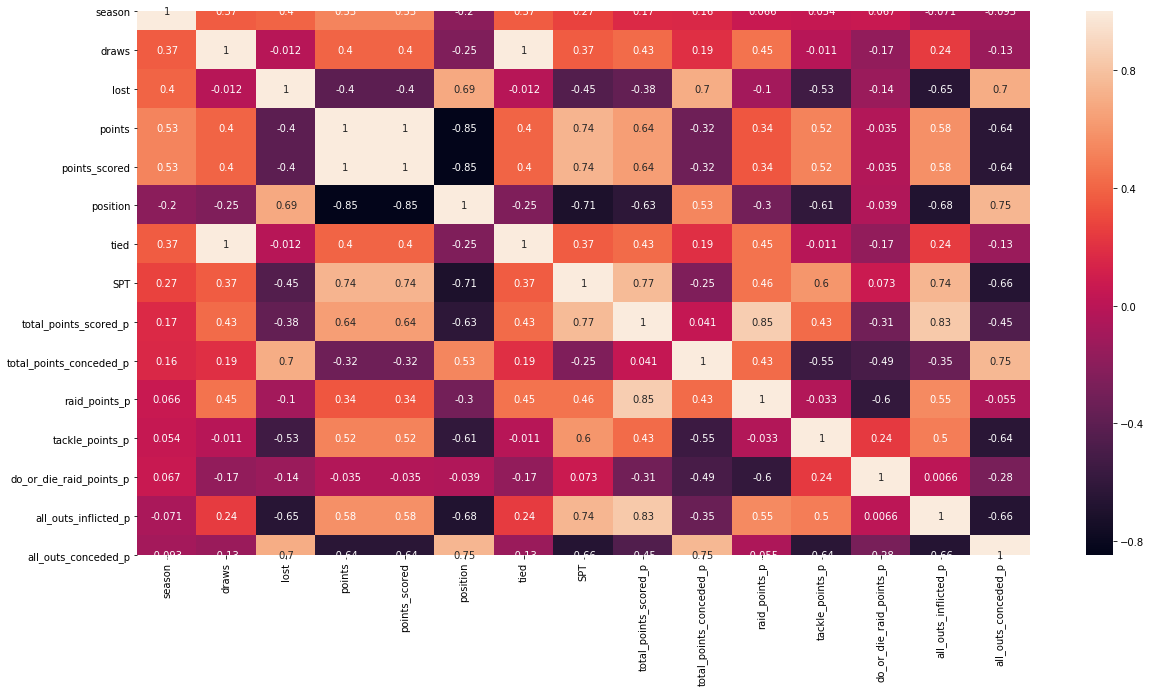

In [1219]:
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(train_x[col].corr(),annot = True)
plt.show()

In [1220]:
#removed highly coorelated columns
col = ['season','tackle_points_p','raid_points_p',
        'all_outs_conceded_p','all_outs_inflicted_p']

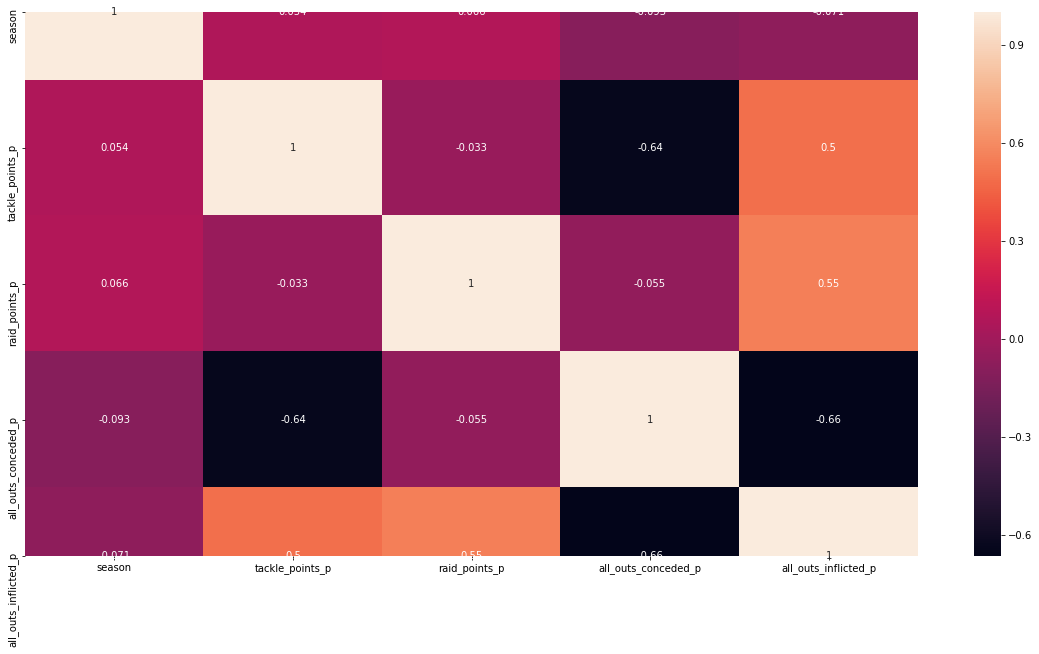

In [1221]:
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(train_x[col].corr(),annot = True)
plt.show()

### Scaling Data 

In [1222]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, roc_auc_score

X = train_x[col]

Y = train_y

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=3)




In [1223]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [1224]:
X_test_pred = sc.transform(test_data[col])

In [1225]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,raid_points_p,98.61
4,all_outs_inflicted_p,49.23
1,tackle_points_p,41.61
3,all_outs_conceded_p,28.11
0,season,6.31


## Module Building 

### 1. Random Forest

In [1226]:
from sklearn.ensemble import RandomForestClassifier

#regressor = RandomForestRegressor(n_estimators=100, random_state=3)

regressor = RandomForestClassifier(n_estimators=75, random_state=3,                    
                              class_weight="balanced")
regressor.fit(X_train, y_train)
y_test_pred = regressor.predict(X_test)



In [1227]:
y_test_pred_final = pd.DataFrame({'winner':y_test, 'winner_Prob':y_test_pred})
#y_train_pred_final['team_id'] = train_id.values
#y_train_pred_final['team_name'] = train_team_name.values
y_test_pred_final.head()

,winner,winner_Prob
24,1,0
46,0,1
21,0,0
65,0,0
58,0,0


In [1230]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

from sklearn import metrics


In [1231]:
auc_score = roc_auc_score( y_test_pred_final.winner, y_test_pred_final.winner_Prob )
print(auc_score)

0.46875


In [1232]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

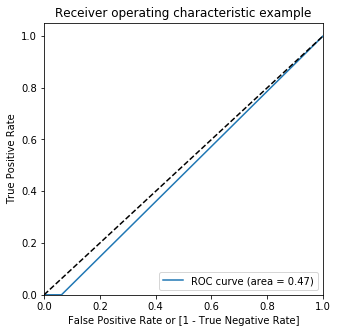

In [1233]:
draw_roc(y_test_pred_final.winner, y_test_pred_final.winner_Prob)

In [1234]:
y_team_pred = regressor.predict_proba(X_test_pred)

In [1235]:
y_test_final = pd.DataFrame({"team_name":test_data.team_name, 'winner_prob':y_team_pred[:,1]})

In [1236]:
y_test_final

,team_name,winner_prob
0,Bengal Warriors,0.480000
1,Bengaluru Bulls,0.013333
2,Patna Pirates,0.000000
3,Dabang Delhi K.C.,0.360000
4,Haryana Steelers,0.000000
5,Puneri Paltan,0.040000
6,Jaipur Pink Panthers,0.013333
7,U Mumba,0.000000
8,Tamil Thalaivas,0.000000
9,Gujarat Fortunegiants,0.000000


### 2. Logistic Regression

In [1237]:
import numpy as np
from sklearn.linear_model import LogisticRegression


est = LogisticRegression(random_state=0, class_weight='balanced')

est.fit(X_train, y_train)

print (roc_auc_score(y_test, est.predict(X_test)))

0.84375


In [1238]:
y_test_pred = est.predict_proba(X_test_pred)

In [1239]:
y_test_final = pd.DataFrame({"team_name":test_data.team_name, 'winner_prob':y_test_pred[:,1]})

In [1240]:
y_test_final

,team_name,winner_prob
0,Bengal Warriors,0.589879
1,Bengaluru Bulls,0.137730
2,Patna Pirates,0.212194
3,Dabang Delhi K.C.,0.560067
4,Haryana Steelers,0.336605
5,Puneri Paltan,0.093821
6,Jaipur Pink Panthers,0.252764
7,U Mumba,0.198808
8,Tamil Thalaivas,0.013087
9,Gujarat Fortunegiants,0.062441


### 3. XGBoost

In [1241]:
from numpy import loadtxt
from xgboost import XGBClassifier


In [1242]:
model = XGBClassifier(scale_pos_weight=6)
                    
                             
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=6, seed=None, silent=None,
       subsample=1, verbosity=1)

In [1243]:
y_pred = model.predict(X_test)


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [1244]:
print (roc_auc_score(y_test, y_pred))

0.4375


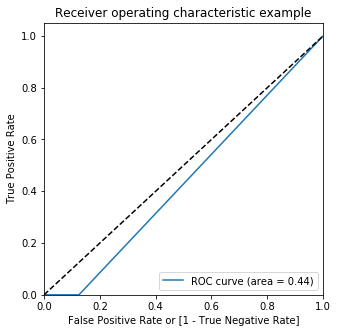

In [1245]:
draw_roc(y_test,y_pred)

In [1246]:
y_pred = model.predict_proba(X_test_pred)

In [1247]:
y_test_final = pd.DataFrame({"team_name":test_data.team_name, 'winner_prob':y_pred[:,1]})

In [1248]:
y_test_final

,team_name,winner_prob
0,Bengal Warriors,0.986731
1,Bengaluru Bulls,0.013447
2,Patna Pirates,0.010524
3,Dabang Delhi K.C.,0.982816
4,Haryana Steelers,0.010524
5,Puneri Paltan,0.008734
6,Jaipur Pink Panthers,0.008734
7,U Mumba,0.010524
8,Tamil Thalaivas,0.010524
9,Gujarat Fortunegiants,0.010524


   Model                  Accuracy 
1. Random Forest :           46 %
2. Logistic Regression:      84%
3. XGBoost :                 43%


Logistic Regression has higher accuracy rate.

***Task 5: Predicting the team with the highest super-performance total is Bengal Warriors ***